In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
data = pd.read_csv("Dataset (4).csv")
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164309.0,1.008216e+07,47432.067027,10000001.0,10041078.00,10082155.00,10123232.00,10164309.00
Annual_Income,139207.0,7.333116e+04,60377.498294,4000.0,45000.00,63000.00,88697.50,7500000.00
Debt_To_Income,164309.0,1.720719e+01,7.845083,0.0,11.37,16.84,22.78,39.99
Inquiries_Last_6Mo,164309.0,7.816979e-01,1.034747,0.0,0.00,0.00,1.00,8.00
Months_Since_Deliquency,75930.0,3.422936e+01,21.761180,0.0,16.00,31.00,50.00,180.00
Number_Open_Accounts,164309.0,1.119382e+01,4.991813,0.0,8.00,10.00,14.00,76.00
Total_Accounts,164309.0,2.506767e+01,11.583067,2.0,17.00,23.00,32.00,156.00
Interest_Rate,164309.0,2.158951e+00,0.738364,1.0,2.00,2.00,3.00,3.00


In [5]:
# Remove Loan ID column as it has no useful information
data = data.drop('Loan_ID',axis=1)

# Uni-variate Analysis

In [6]:
# Why is Loan_Amount_Requested an object column?
data.Loan_Amount_Requested.unique()
# Ans.: It has commas in the amount.

array(['7,000', '30,000', '24,725', ..., '28,950', '33,325', '29,825'],
      dtype=object)

In [7]:
# Remove commas and convert it to int datatype
data.Loan_Amount_Requested = data.Loan_Amount_Requested.replace(',','',regex=True).astype('int64')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  int64  
 1   Length_Employed          156938 non-null  object 
 2   Home_Owner               138960 non-null  object 
 3   Annual_Income            139207 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  75930 non-null   float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 16.3+ MB


In [9]:
# Converting Length_Employed to numeric data: <1 is shown as 0 and 10+ as 10. missing values are replaced with -1.
data.Length_Employed = data.Length_Employed.replace(['years','year','< 1','\+'],['','','0',''],regex=True).fillna(-1).astype('int')

<AxesSubplot:xlabel='Length_Employed', ylabel='count'>

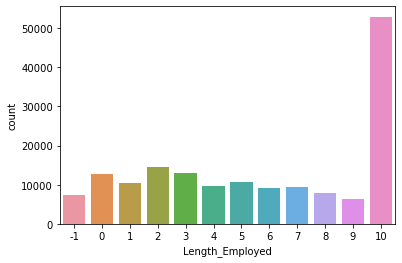

In [10]:
sns.countplot(x=data.Length_Employed.fillna(-1))

In [11]:
# Home_owner distribution before filling missing values
data.Home_Owner.value_counts(normalize=True)

Mortgage    0.506225
Rent        0.403217
Own         0.090134
Other       0.000353
None        0.000072
Name: Home_Owner, dtype: float64

In [12]:
data.Home_Owner = data.Home_Owner.fillna(pd.Series(np.random.choice(['Mortgage','Rent','Own','Other','None'],
                                                                    p=[0.506224,0.403217,0.090134,0.000353,0.000072],size=len(data))))

In [13]:
# Home_owner distribution after filling missing values
data.Home_Owner.value_counts(normalize=True)

Mortgage    0.506326
Rent        0.403478
Own         0.089727
Other       0.000396
None        0.000073
Name: Home_Owner, dtype: float64

40.22530582196167


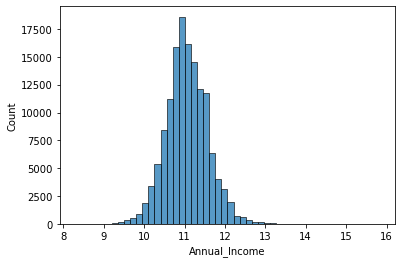

In [14]:
# Annual_Income: Highly skewed distribution with outliers. Log-transformation converts it to approximately normal distribution
print(data.Annual_Income.skew())
sns.histplot(x=np.log(data.Annual_Income),bins=50)
data.Annual_Income = np.log(data.Annual_Income)

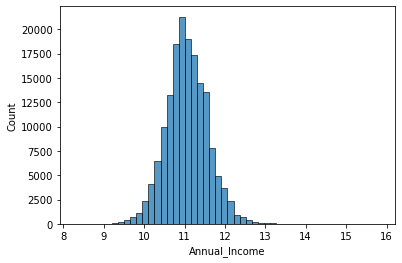

In [15]:
# Filling missing values in Annual Income while maintaining the distribution
sns.histplot(data.Annual_Income.fillna(pd.Series(np.random.normal(loc=11.057788,scale=0.519843,size=len(data)))),bins=50)
data.Annual_Income = data.Annual_Income.fillna(pd.Series(np.random.normal(loc=11.057788,scale=0.519843,size=len(data))))

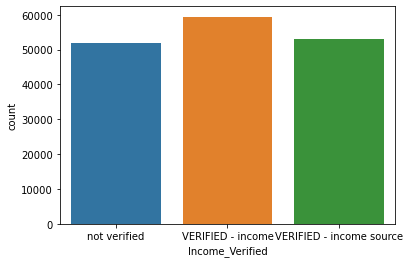

In [16]:
sns.countplot(x=data.Income_Verified);

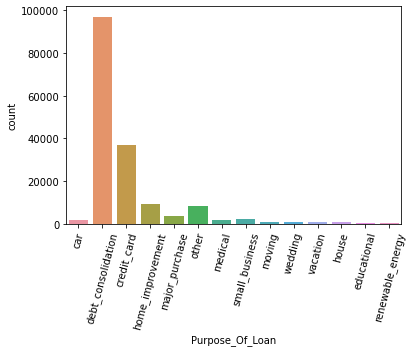

In [17]:
sns.countplot(x=data.Purpose_Of_Loan)
plt.xticks(rotation='75');

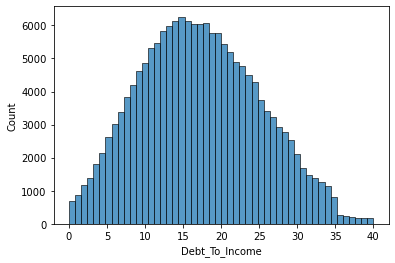

In [18]:
sns.histplot(x=data.Debt_To_Income,bins=50);

<AxesSubplot:xlabel='Inquiries_Last_6Mo', ylabel='count'>

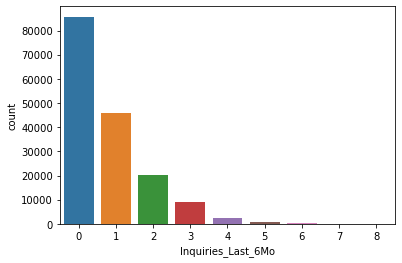

In [19]:
sns.countplot(x=data.Inquiries_Last_6Mo)

In [20]:
# We want to keep missing values as separate in this column, so they are filled with -1
data.Months_Since_Deliquency.fillna(-1,inplace=True)

<AxesSubplot:ylabel='Frequency'>

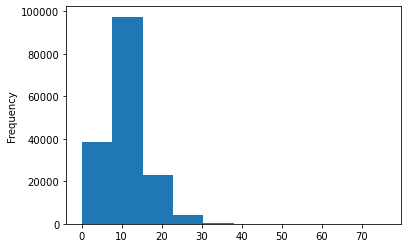

In [21]:
data.Number_Open_Accounts.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

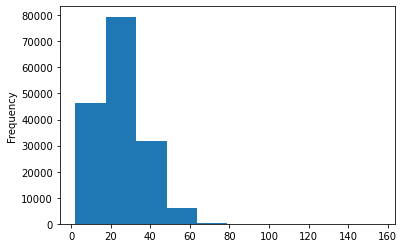

In [22]:
data.Total_Accounts.plot(kind='hist')

<AxesSubplot:xlabel='Gender', ylabel='count'>

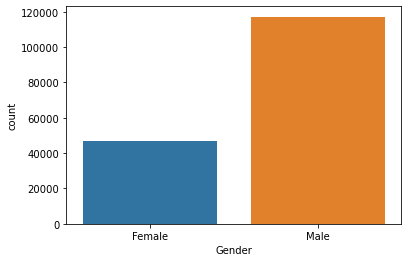

In [23]:
sns.countplot(x=data.Gender)

2    0.429557
3    0.364697
1    0.205746
Name: Interest_Rate, dtype: float64

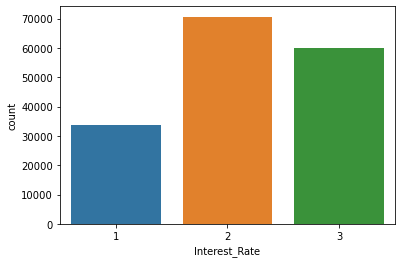

In [24]:
# data is slightly imabalanced
sns.countplot(x=data.Interest_Rate);
data.Interest_Rate.value_counts(normalize=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  int64  
 1   Length_Employed          164309 non-null  int32  
 2   Home_Owner               164309 non-null  object 
 3   Annual_Income            164309 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  164309 non-null  float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(3), int32(1), int64(5), object(4)
memory usage: 

# Bi-variate Analysis

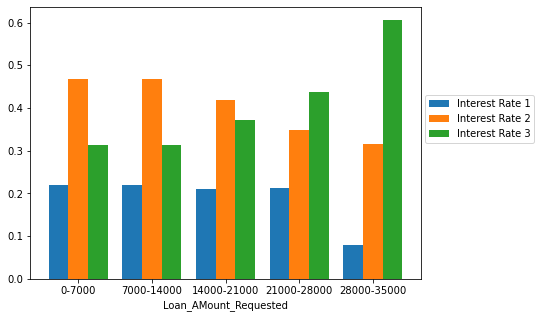

In [26]:
data.groupby(pd.cut(data.Loan_Amount_Requested,bins=5,labels=np.arange(5)))['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(7,5))
plt.xticks([0,1,2,3,4],['0-7000','7000-14000','14000-21000','21000-28000','28000-35000'],rotation=0)
plt.xlabel("Loan_AMount_Requested")
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

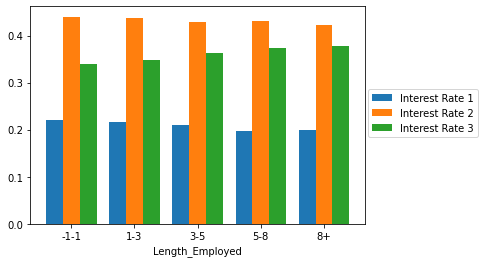

In [27]:
data.groupby(pd.cut(data.Length_Employed,[-1,1,3,5,8,10],labels=[0,1,2,3,4]))['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8)
plt.xticks([0,1,2,3,4],['-1-1','1-3','3-5','5-8','8+'],rotation='0')
plt.legend(loc=(1.01,0.4),labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3']);

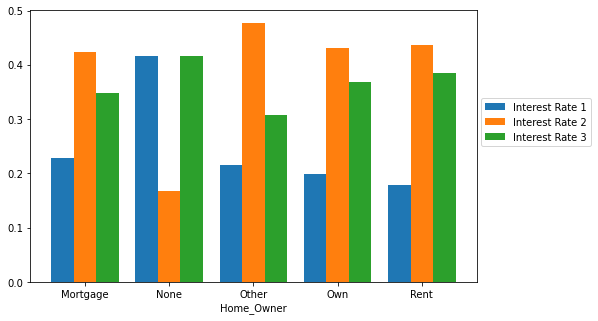

In [28]:
data.groupby(data.Home_Owner)['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(8,5))
plt.xticks(rotation=0)
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

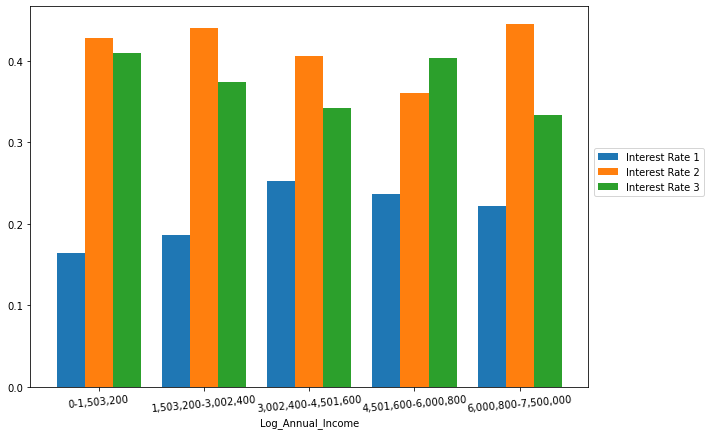

In [29]:
data.groupby(pd.cut(data.Annual_Income,bins=5,labels=np.arange(5)))['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(10,7))
plt.xticks([0,1,2,3,4],['0-1,503,200','1,503,200-3,002,400','3,002,400-4,501,600','4,501,600-6,000,800','6,000,800-7,500,000'],rotation='5')
plt.xlabel("Log_Annual_Income")
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

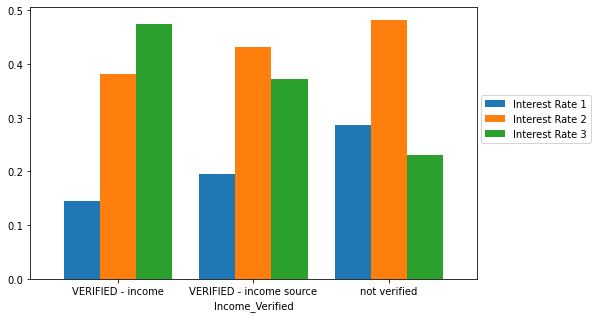

In [30]:
data.groupby(data.Income_Verified)['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(8,5))
plt.xticks(rotation=0)
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

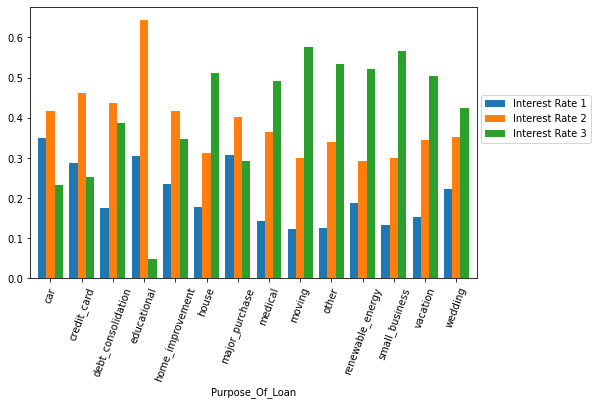

In [31]:
data.groupby(data.Purpose_Of_Loan)['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(8,5))
plt.xticks(rotation='70')
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

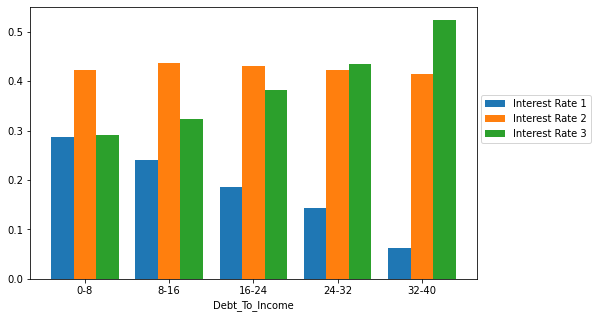

In [32]:
data.groupby(pd.cut(data.Debt_To_Income,bins=5,labels=np.arange(5)))['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(8,5))
plt.xticks(ticks=[0,1,2,3,4],labels = ["0-8", "8-16" , "16-24", "24-32", "32-40"], rotation='0')
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

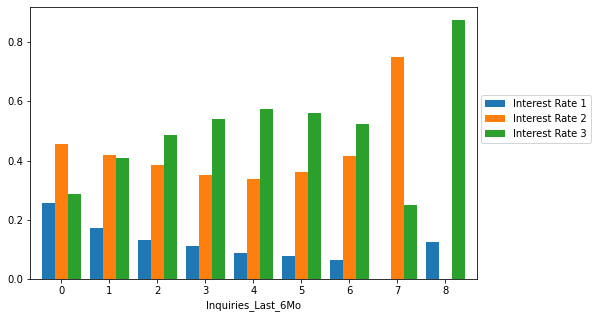

In [33]:
data.groupby(data.Inquiries_Last_6Mo)['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(8,5))
plt.xticks(rotation=0)
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

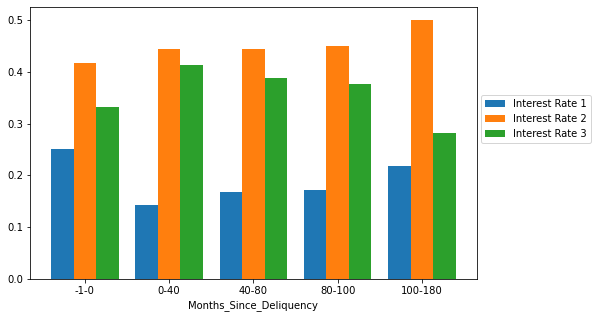

In [34]:
data.groupby(pd.cut(data.Months_Since_Deliquency,bins=[-1.001,0,40,80,100,180],labels=np.arange(5)))['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(8,5))
plt.xticks(ticks=[0,1,2,3,4],labels=["-1-0","0-40","40-80","80-100","100-180"],rotation=0)
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

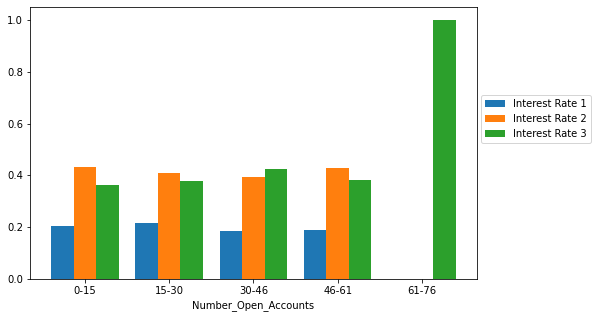

In [35]:
data.groupby(pd.cut(data.Number_Open_Accounts,bins=5,labels=np.arange(5)))['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(8,5))
plt.xticks(ticks=[0,1,2,3,4],labels=["0-15","15-30","30-46","46-61","61-76"],rotation=0)
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

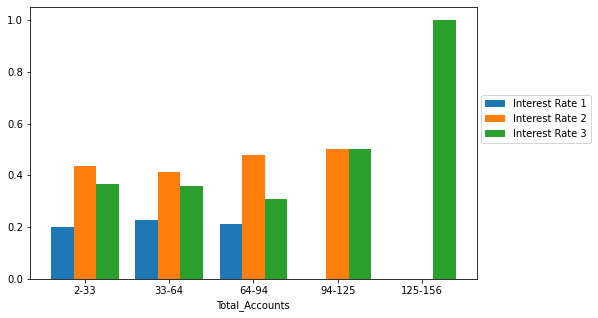

In [36]:
data.groupby(pd.cut(data.Total_Accounts,bins=5,labels=np.arange(5)))['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(8,5))
plt.xticks(ticks=[0,1,2,3,4],labels=["2-33","33-64","64-94","94-125","125-156"],rotation=0)
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

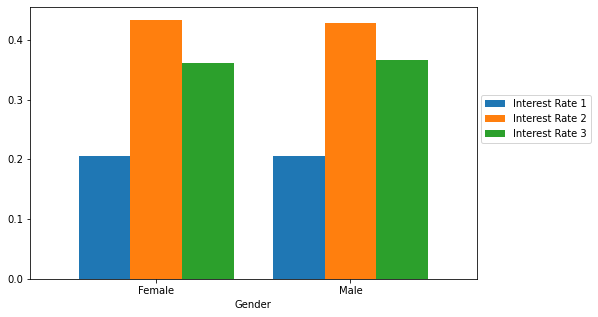

In [37]:
data.groupby(data.Gender)['Interest_Rate'].value_counts(
    normalize=True).unstack().plot(kind='bar',width=0.8,figsize=(8,5))
plt.xticks(rotation=0)
plt.legend(labels=['Interest Rate 1','Interest Rate 2','Interest Rate 3'],loc=(1.01,0.5));

# Model Building

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_Amount_Requested    164309 non-null  int64  
 1   Length_Employed          164309 non-null  int32  
 2   Home_Owner               164309 non-null  object 
 3   Annual_Income            164309 non-null  float64
 4   Income_Verified          164309 non-null  object 
 5   Purpose_Of_Loan          164309 non-null  object 
 6   Debt_To_Income           164309 non-null  float64
 7   Inquiries_Last_6Mo       164309 non-null  int64  
 8   Months_Since_Deliquency  164309 non-null  float64
 9   Number_Open_Accounts     164309 non-null  int64  
 10  Total_Accounts           164309 non-null  int64  
 11  Gender                   164309 non-null  object 
 12  Interest_Rate            164309 non-null  int64  
dtypes: float64(3), int32(1), int64(5), object(4)
memory usage: 

In [39]:
data_encoded = pd.get_dummies(data,drop_first=True)

In [40]:
X = data_encoded.drop('Interest_Rate',axis=1)
y = data_encoded.Interest_Rate

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
dt.score(X_train,y_train)

1.0

In [45]:
dt.score(X_test,y_test)

0.4304059399914795

In [46]:
dt.tree_.impurity.nonzero()[0].shape

(44339,)

In [47]:
dt.tree_.impurity.shape

(88679,)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(dt.predict(X_train),y_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     27123
           2       1.00      1.00      1.00     56291
           3       1.00      1.00      1.00     48033

    accuracy                           1.00    131447
   macro avg       1.00      1.00      1.00    131447
weighted avg       1.00      1.00      1.00    131447



In [50]:
print(classification_report(dt.predict(X_test),y_test))

              precision    recall  f1-score   support

           1       0.33      0.32      0.32      6884
           2       0.45      0.46      0.45     13922
           3       0.47      0.46      0.46     12056

    accuracy                           0.43     32862
   macro avg       0.41      0.41      0.41     32862
weighted avg       0.43      0.43      0.43     32862



In [51]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features=6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=6)

In [52]:
dt.score(X_test,y_test)

0.49996956971578116

In [53]:
dt = DecisionTreeClassifier(max_depth=8,min_samples_split=1000,
                           min_samples_leaf=1000)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=1000,
                       min_samples_split=1000)

In [54]:
dt.score(X_test,y_test)

0.5088247824234678

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [6,8,10], 'min_samples_split':[1000,2000,500],
              'min_samples_leaf':[500,1000,2000]}
gcv = GridSearchCV(dt,param_grid,n_jobs=-1,cv=3,verbose=1)
gcv.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=8,
                                              min_samples_leaf=1000,
                                              min_samples_split=1000),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_leaf': [500, 1000, 2000],
                         'min_samples_split': [1000, 2000, 500]},
             verbose=1)

In [56]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=500,
                       min_samples_split=1000)

In [57]:
gcv.score(X_test,y_test)

0.5134501856247338

In [58]:
dt = DecisionTreeClassifier(max_depth=5, max_features=7)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.4813462357738421

In [59]:
dt = DecisionTreeClassifier(splitter='random',max_features=10)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.42419816201083316

In [63]:
dt = DecisionTreeClassifier()
param_grid = {'criterion': ['gini','entropy'],
    'max_depth':[5,8,10,15] ,
    'min_samples_split': [100,500,1000],
    'min_samples_leaf':[100,500,1000],
    'max_features':['sqrt',10,12],
    'max_leaf_nodes':[100,500,1000],
    'min_impurity_decrease': [0.001,0.01,0.1],
    'ccp_alpha': [0.00001,0.0001,0.01]}
gcv = GridSearchCV(dt, param_grid, n_jobs=-1,cv=5,verbose=3)
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [1e-05, 0.0001, 0.01],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 10, 15],
                         'max_features': ['sqrt', 10, 12],
                         'max_leaf_nodes': [100, 500, 1000],
                         'min_impurity_decrease': [0.001, 0.01, 0.1],
                         'min_samples_leaf': [100, 500, 1000],
                         'min_samples_split': [100, 500, 1000]},
             verbose=3)

In [64]:
gcv.score(X_test,y_test)

0.4907187633132494

In [65]:
gcv.best_estimator_

DecisionTreeClassifier(ccp_alpha=1e-05, criterion='entropy', max_depth=10,
                       max_features=12, max_leaf_nodes=100,
                       min_impurity_decrease=0.001, min_samples_leaf=500,
                       min_samples_split=500)

In [66]:
dt_best = DecisionTreeClassifier(max_depth=10, min_samples_leaf=500,min_samples_split=1000)
dt_best.fit(X_train,y_train)
dt_best.score(X_test,y_test)

0.5134501856247338

In [68]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           1       0.49      0.21      0.29      6683
           2       0.49      0.64      0.55     14289
           3       0.56      0.54      0.55     11890

    accuracy                           0.51     32862
   macro avg       0.51      0.46      0.46     32862
weighted avg       0.51      0.51      0.50     32862

